# https://www.kaggle.com/c/petfinder-adoption-prediction/data
## Phase 1 Objectives:
### Exploratory analysis, data cleaning, feature engineering
### Create binary classification models to determine if a pet will be adopted or not
### Calculate some accuracy statistics, ROC, etc
### Interpret impact of different input variables (if applicable to model selected)

## Phase 2 Objectives:
### implement NLP for description field
### predict adoption speed instead of just yes/no (survival?)



#### Import libraries and Read in data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,10))
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

C:\Users\molly\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<Figure size 1800x720 with 0 Axes>

In [2]:
train = pd.read_csv('train.csv')

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


#### check out data, clean up

In [3]:
train.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [4]:
train = train.drop(['RescuerID', 'State', 'Description', 'Breed1', 'Breed2', 'PetID', 'Color2', 'Color3'],axis = 1)

#bring back in description for phase 2, for now don't need
#breed is probably important.. but will be complicated with so many levels, so leaving out for now. bring back though!


#IDEAS FOR LATER:
#purebreds only have one breed listed, mutts have multiple. make a new variable for purebred vs mutt? ONLY FOR DOGS
#the name itself is probably worthless, but could make variable if pet has been named or not. lots of no-names in data.

In [5]:
#TRIED MODEL FOR ALL PETS AND IT SUCKED, NOW MAKING IT JUST FOR CATS! cuz cats are better
train = train[train.Type == 2]

train = train.drop(['Type'],axis = 1)


In [6]:
#only want records for a single pet adoption, once filtered don't need Quantity
train = train[train.Quantity == 1]

train = train.drop(['Quantity'],axis = 1)

In [7]:
#changing adoption speed (0,1,2,3,4) to just a binary yes or no
#for phase 2 will use adpotion speed

train['Adopted'] = np.where(train['AdoptionSpeed']==4, 0, 1)
train = train.drop(['AdoptionSpeed'],axis = 1)
train.head()

,Name,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt,Adopted
0,Nibble,3,1,1,1,1,2,2,2,1,100,0,1.0,1
1,No Name Yet,1,1,1,2,2,3,3,3,1,0,0,2.0,1
5,NaN,3,2,5,2,1,2,2,2,1,0,0,2.0,1
6,BULAT,12,1,1,2,3,2,2,3,1,300,0,3.0,1
8,NaN,2,2,6,2,2,2,2,2,1,0,0,6.0,1


In [8]:
#annoying that photo is float... changing for my own sanity
train.PhotoAmt = train.PhotoAmt.astype(int)
train.head()

,Name,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt,Adopted
0,Nibble,3,1,1,1,1,2,2,2,1,100,0,1,1
1,No Name Yet,1,1,1,2,2,3,3,3,1,0,0,2,1
5,NaN,3,2,5,2,1,2,2,2,1,0,0,2,1
6,BULAT,12,1,1,2,3,2,2,3,1,300,0,3,1
8,NaN,2,2,6,2,2,2,2,2,1,0,0,6,1


In [9]:
train.info()
#no null values EXCEPT NAME

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4943 entries, 0 to 14991
Data columns (total 14 columns):
Name            4644 non-null object
Age             4943 non-null int64
Gender          4943 non-null int64
Color1          4943 non-null int64
MaturitySize    4943 non-null int64
FurLength       4943 non-null int64
Vaccinated      4943 non-null int64
Dewormed        4943 non-null int64
Sterilized      4943 non-null int64
Health          4943 non-null int64
Fee             4943 non-null int64
VideoAmt        4943 non-null int64
PhotoAmt        4943 non-null int32
Adopted         4943 non-null int32
dtypes: int32(2), int64(11), object(1)
memory usage: 540.6+ KB


In [10]:
#create new binary variable for if pet has a name. actual name is pretty worthless

train.Name.fillna(value='No Name', inplace=True)

train['Name'] = np.where((train['Name']=='No Name Yet') | (train['Name']=='No Name')| (train['Name']=='None'), 0, 1)
train.Name.value_counts()

1    4612
0     331
Name: Name, dtype: int64

In [11]:
colnames = list(train)

for i in colnames:
    print (train[i].value_counts())
    #print (train[i].value_counts().plot(kind='bar')) 
    
#loop to print bar charts for each variable doesn't work for some reason. only prints last graph.
#revisit later... likely a jupyter issue


#IMPORTANT TAKEAWAYS:
#need to clean up Age variable!
#bucket the fees maybe?
#sterilized vaccinated dewormed etc... value 3 = unknown. group those with nos maybe to make binary?

1    4612
0     331
Name: Name, dtype: int64
2      1007
3       740
1       588
4       489
12      398
5       280
6       275
24      172
7       133
8       122
36       88
10       73
9        71
18       58
11       46
48       43
14       37
0        36
60       26
15       26
17       25
16       19
30       16
13       14
21       14
84       13
72       13
20       12
29       12
19        9
       ... 
31        3
42        3
51        2
96        2
132       2
40        2
39        2
38        2
32        2
62        2
34        2
80        2
44        1
147       1
92        1
112       1
144       1
180       1
212       1
67        1
53        1
61        1
69        1
73        1
89        1
46        1
78        1
47        1
55        1
33        1
Name: Age, Length: 70, dtype: int64
2    2662
1    2281
Name: Gender, dtype: int64
1    2306
2     816
6     490
3     478
4     363
7     256
5     234
Name: Color1, dtype: int64
2    3063
1    1472
3     401
4       7
Nam

In [12]:
train = train[train.Age < 18]
train.shape
#age shouldn't be above this number, not sure why so many are, but filtering out

(4379, 14)

In [13]:
#if MaturitySize, Health, or FurLength is not specified - filter out for now

train = train[(train.MaturitySize != 0) & (train.Health != 0) & (train.FurLength != 0)]

In [14]:
train['Vaccinated'] = np.where(train['Vaccinated']==1, 1, 0)
train['Sterilized'] = np.where(train['Sterilized']==1, 1, 0)
train['Dewormed'] = np.where(train['Dewormed']==1, 1, 0)
#converting these 3 to binary. if unknown will consider this a no now

#so few are in the critically injured category, making this just a healthy/nonhealthy binary
train['Health'] = np.where(train['Health']==1, 1, 0)
train.head()

,Name,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt,Adopted
0,1,3,1,1,1,1,0,0,0,1,100,0,1,1
1,0,1,1,1,2,2,0,0,0,1,0,0,2,1
5,0,3,2,5,2,1,0,0,0,1,0,0,2,1
6,1,12,1,1,2,3,0,0,0,1,300,0,3,1
8,0,2,2,6,2,2,0,0,0,1,0,0,6,1


In [15]:
#join on actual color name, not just number. will make dummy variables more interpretable later on
colors = pd.read_csv('color_labels.csv')
colors.rename(columns={'ColorID':'Color1'}, inplace=True)
colors.head()

,Color1,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [16]:
#Now have ColorName variable
train = pd.merge(train, colors, on='Color1', how='left')
train = train.drop(columns='Color1')

In [17]:
#MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large)

conditions = [
    (train['MaturitySize'] == 1),
    (train['MaturitySize'] == 2),
    (train['MaturitySize'] == 3),
    (train['MaturitySize'] == 4)]
choices = ['Small', 'Medium', 'Large', 'ExtraLarge']
train['MaturitySize'] = np.select(conditions, choices)

train.MaturitySize.value_counts()

Medium        2684
Small         1416
Large          276
ExtraLarge       3
Name: MaturitySize, dtype: int64

In [18]:
#FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long)

conditions = [
    (train['FurLength'] == 1),
    (train['FurLength'] == 2),
    (train['FurLength'] == 3)]
choices = ['Short', 'Medium', 'Long']
train['FurLength'] = np.select(conditions, choices)

train.FurLength.value_counts()

Short     2664
Medium    1452
Long       263
Name: FurLength, dtype: int64

In [19]:
#Originally Type = Type of animal (1 = Dog, 2 = Cat)
#Make this a 0-1 binary instead ... now 0 = Dog and 1 = Cat. 

#train['Type'] = train.Type - 1
#train.Type.value_counts()



In [20]:
#Originilly Gender - Gender of pet (1 = Male, 2 = Female)
#Make this a 0-1 binary instead ... now 0 = Male and 1 = Female.

train['Gender'] = train.Gender - 1
train.Gender.value_counts()

1    2325
0    2054
Name: Gender, dtype: int64

count    4379.000000
mean       19.345741
std        64.037825
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Fee, dtype: float64

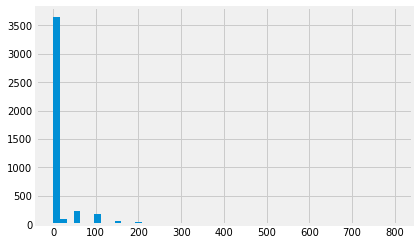

In [21]:
#not sure if I want to bin the fee variable. going to leave it as continuous for now, may edit later.

train.Fee.hist(bins=50);
train.Fee.describe()

#### exploratory analysis

In [22]:
train.head(20)

,Name,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt,Adopted,ColorName
0,1,3,0,Small,Short,0,0,0,1,100,0,1,1,Black
1,0,1,0,Medium,Medium,0,0,0,1,0,0,2,1,Black
2,0,3,1,Medium,Short,0,0,0,1,0,0,2,1,Cream
3,1,12,0,Medium,Long,0,0,0,1,300,0,3,1,Black
4,0,2,1,Medium,Medium,0,0,0,1,0,0,6,1,Gray
5,1,12,1,Medium,Medium,0,0,0,1,0,0,2,0,Black
6,1,3,1,Large,Long,1,1,0,1,50,0,2,1,Black
7,1,6,1,Small,Short,1,1,1,1,0,0,1,1,Brown
8,1,3,0,Small,Short,0,1,0,1,0,0,19,1,Brown
9,0,2,0,Medium,Medium,0,0,0,1,0,0,11,1,Golden


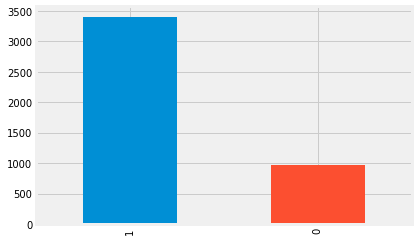

In [23]:
#visualize the target variable

train.Adopted.value_counts().plot(kind='bar'); 
#not super balanced... but is it bad enough to have to manually intervene? i will say no at this point

In [24]:
count_no = len(train[train['Adopted']==0])
count_yes = len(train[train['Adopted']==1])
pct_of_no = count_no /(count_no+count_yes)
print("percentage of animals not adopted is", pct_of_no*100,"%")
pct_of_yes = count_yes/(count_no+count_yes)
print("percentage of animals adopted is", pct_of_yes*100,"%")

percentage of animals not adopted is 22.265357387531402 %
percentage of animals adopted is 77.73464261246859 %


In [25]:
train.groupby('Adopted').mean()
#quick way to view differences across target variable

,Name,Age,Gender,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt
Adopted,,,,,,,,,,
0,0.914872,6.475897,0.569231,0.345641,0.509744,0.246154,0.953846,21.277949,0.026667,3.041026
1,0.933020,4.080787,0.519976,0.268508,0.556404,0.127497,0.968860,18.792303,0.067274,4.107814


Text(0,0.5,'Proportion of Adoptions')

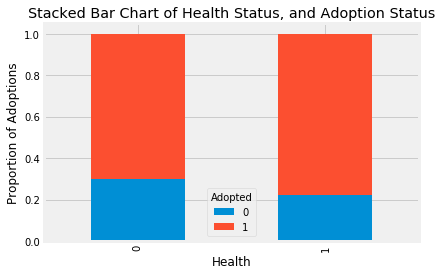

In [26]:
table=pd.crosstab(train.Health,train.Adopted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Health Status, and Adoption Status')
plt.xlabel('Health')
plt.ylabel('Proportion of Adoptions')

Text(0,0.5,'Proportion of Adoptions')

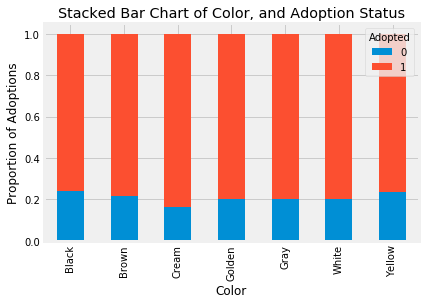

In [27]:
table=pd.crosstab(train.ColorName,train.Adopted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Color, and Adoption Status')
plt.xlabel('Color')
plt.ylabel('Proportion of Adoptions')

Text(0,0.5,'Proportion of Adoptions')

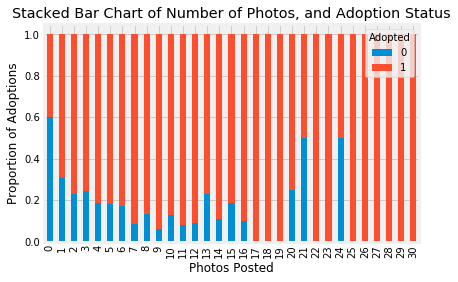

In [28]:
table=pd.crosstab(train.PhotoAmt,train.Adopted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Number of Photos, and Adoption Status')
plt.xlabel('Photos Posted')
plt.ylabel('Proportion of Adoptions')

Text(0,0.5,'Proportion of Adoptions')

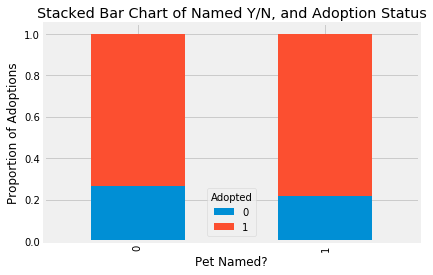

In [29]:
table=pd.crosstab(train.Name,train.Adopted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Named Y/N, and Adoption Status')
plt.xlabel('Pet Named?')
plt.ylabel('Proportion of Adoptions')

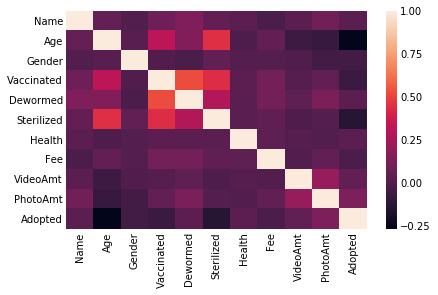

In [30]:
sns.heatmap(train.corr())
#nothing super correlated with adopted

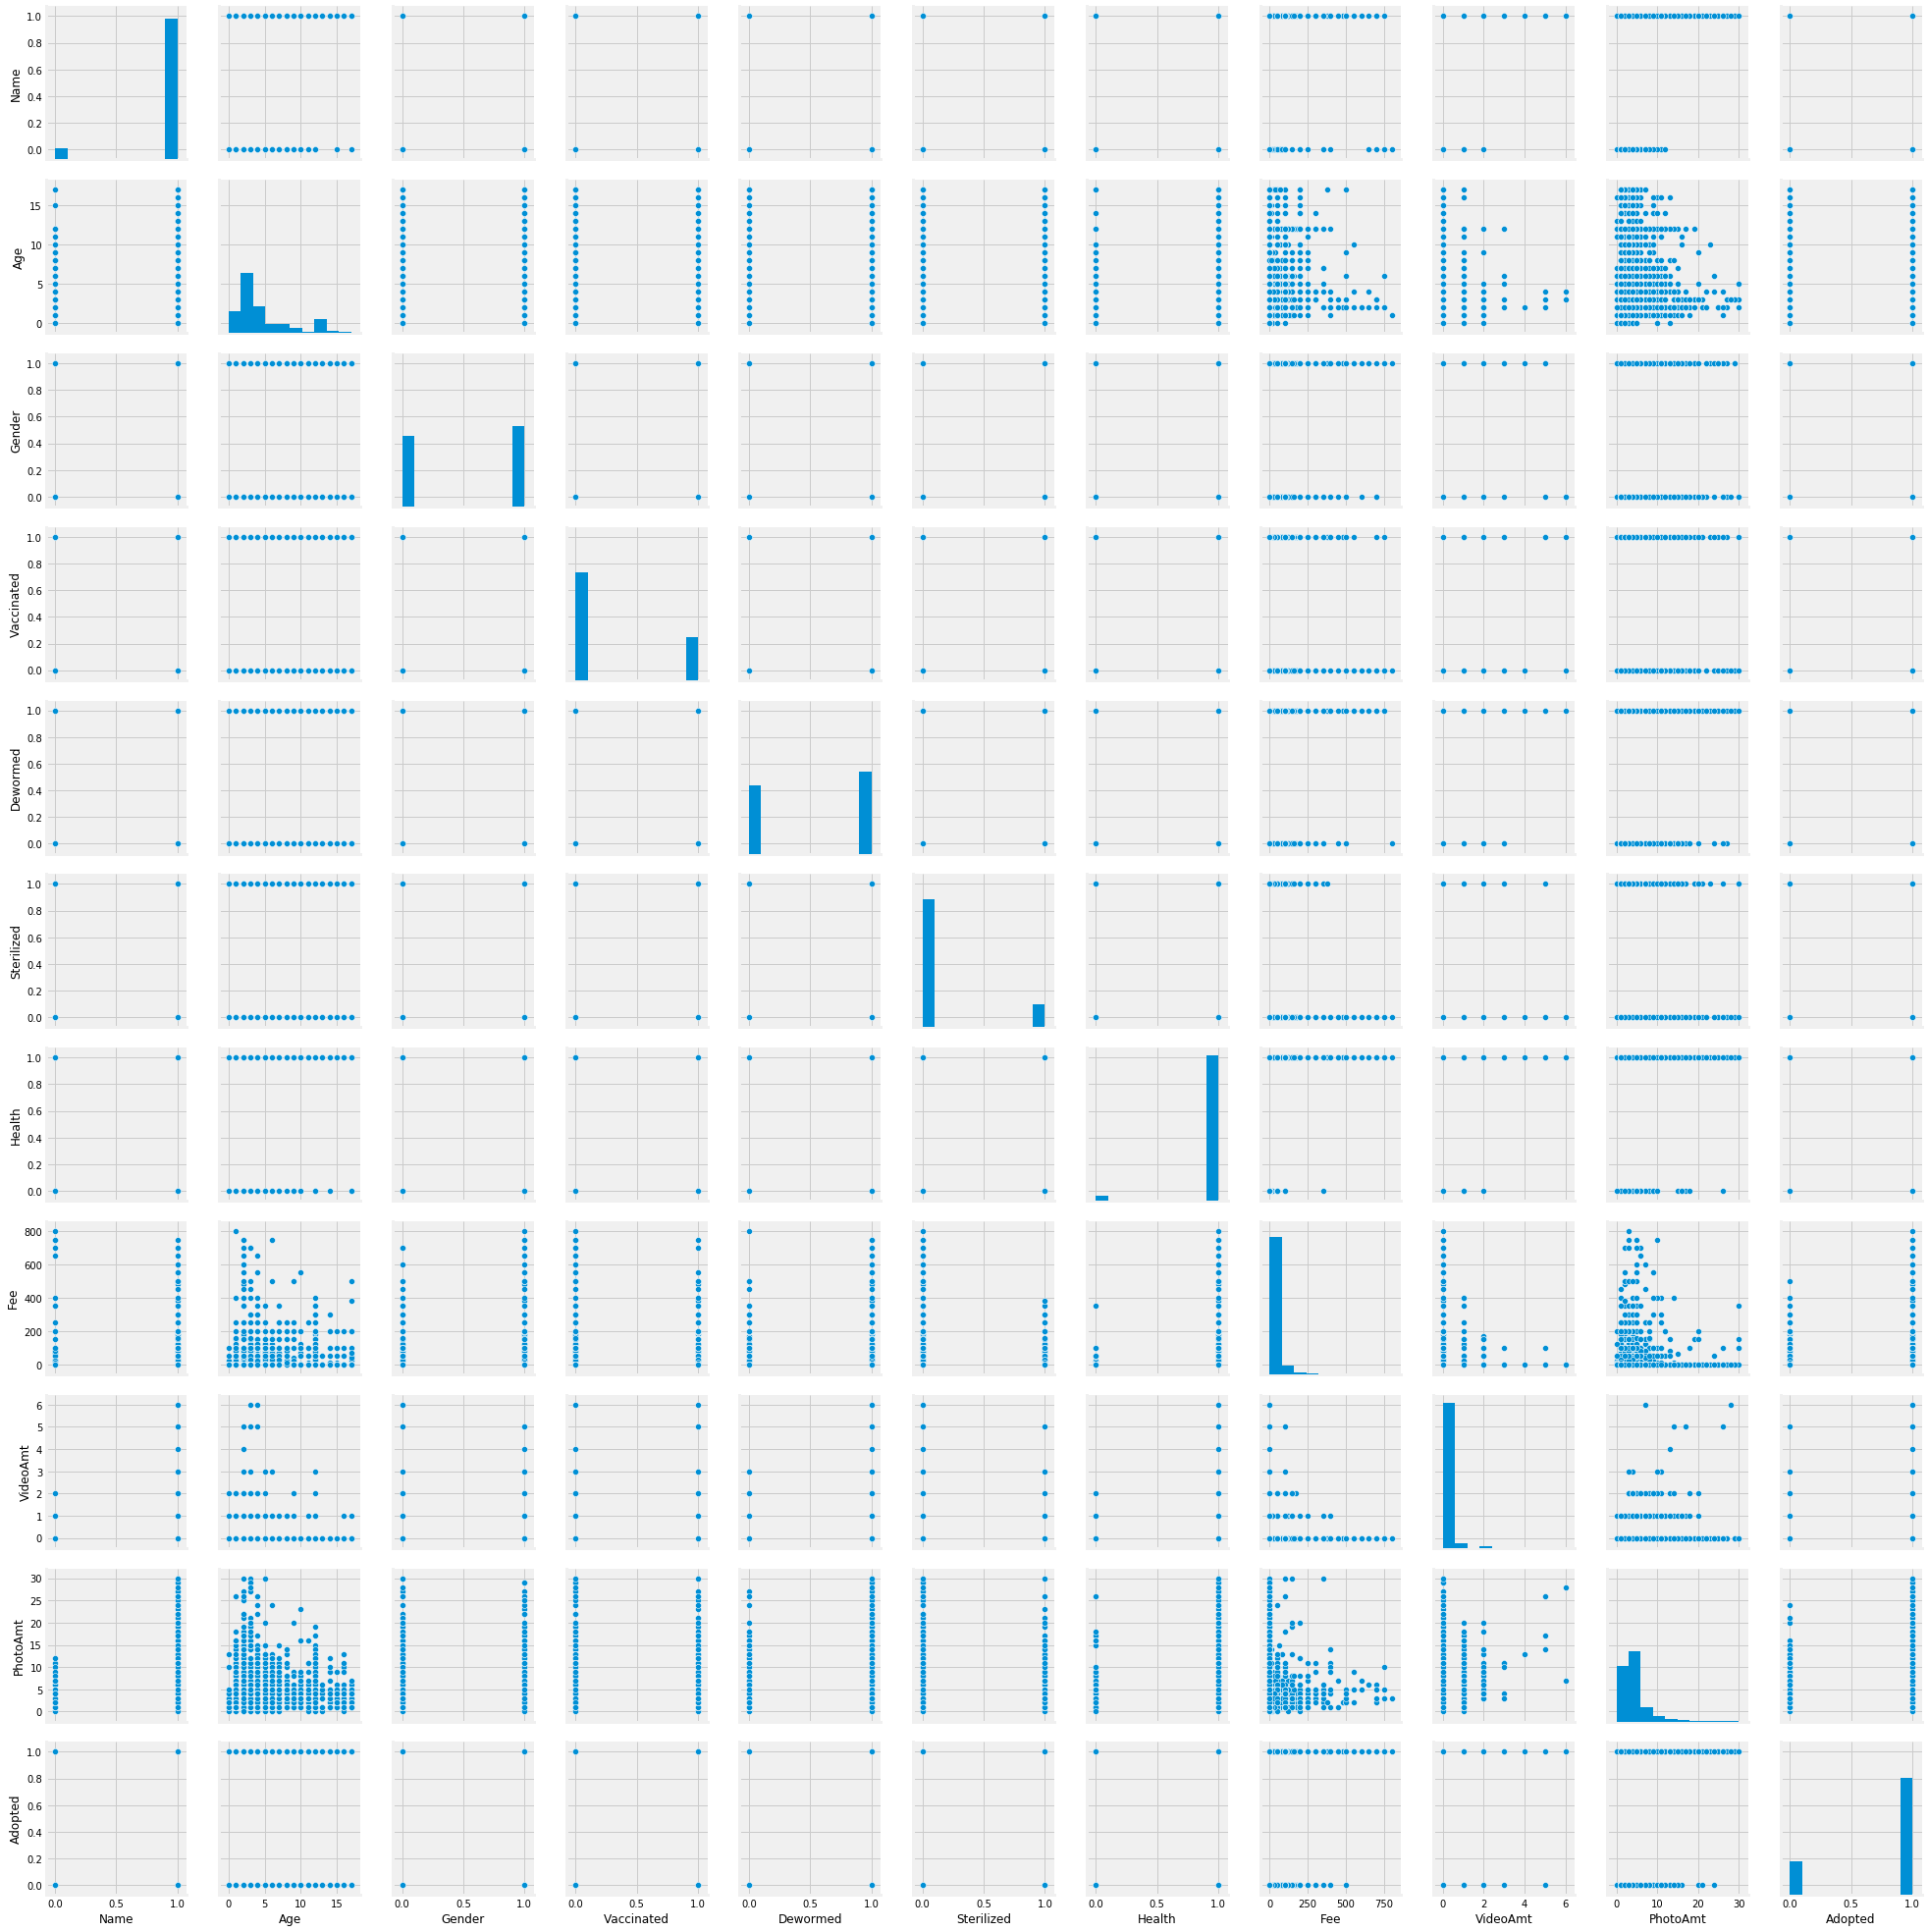

In [31]:
sns.pairplot(train);
#so ugly

#### create dummy variables

In [32]:
#variable types

cat_vars=['MaturitySize', 'FurLength', 'ColorName']
binary_vars= ['Gender', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health']
cont_vars= ['Age', 'Fee', 'PhotoAmt', 'VideoAmt']
target = ['Adopted']

In [33]:
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train[var], prefix=var)
    train1=train.join(cat_list)
    train=train1

train_vars=train.columns.values.tolist()
to_keep=[i for i in train_vars if i not in cat_vars]

In [34]:
train_final=train[to_keep]
train_final.columns.values

array(['Name', 'Age', 'Gender', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Fee', 'VideoAmt', 'PhotoAmt', 'Adopted',
       'MaturitySize_ExtraLarge', 'MaturitySize_Large',
       'MaturitySize_Medium', 'MaturitySize_Small', 'FurLength_Long',
       'FurLength_Medium', 'FurLength_Short', 'ColorName_Black',
       'ColorName_Brown', 'ColorName_Cream', 'ColorName_Golden',
       'ColorName_Gray', 'ColorName_White', 'ColorName_Yellow'],
      dtype=object)

In [35]:
#final dataset, ready for modeling
train_final.head(10)

,Name,Age,Gender,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt,...,FurLength_Long,FurLength_Medium,FurLength_Short,ColorName_Black,ColorName_Brown,ColorName_Cream,ColorName_Golden,ColorName_Gray,ColorName_White,ColorName_Yellow
0,1,3,0,0,0,0,1,100,0,1,...,0,0,1,1,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,2,...,0,1,0,1,0,0,0,0,0,0
2,0,3,1,0,0,0,1,0,0,2,...,0,0,1,0,0,1,0,0,0,0
3,1,12,0,0,0,0,1,300,0,3,...,1,0,0,1,0,0,0,0,0,0
4,0,2,1,0,0,0,1,0,0,6,...,0,1,0,0,0,0,0,1,0,0
5,1,12,1,0,0,0,1,0,0,2,...,0,1,0,1,0,0,0,0,0,0
6,1,3,1,1,1,0,1,50,0,2,...,1,0,0,1,0,0,0,0,0,0
7,1,6,1,1,1,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
8,1,3,0,0,1,0,1,0,0,19,...,0,0,1,0,1,0,0,0,0,0
9,0,2,0,0,0,0,1,0,0,11,...,0,1,0,0,0,0,1,0,0,0


#### train test split

In [49]:
X = train_final.drop('Adopted', axis=1)
y = train_final.Adopted

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=24)

In [51]:
print(X_train.shape, X_test.shape)

(3065, 24) (1314, 24)


#### Logistic Regression!

In [52]:
#Recursive variable selection

#data_final_vars=train_final.columns.values.tolist()
#y=['Adopted']
#X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train.values.ravel())
include = rfe.support_
cols = X_train.columns.values.tolist()
print(rfe.ranking_)


dictionary = dict(zip(cols, include))
print(dictionary)
#dictionary shows what variables are recommended to include. good starting point, but will play.

[ 1  2  8  1  1  1  1 13  1  5  1  1  1 10  1  4 11  1  6  1 12  3  7  9]
{'Name': True, 'Age': False, 'Gender': False, 'Vaccinated': True, 'Dewormed': True, 'Sterilized': True, 'Health': True, 'Fee': False, 'VideoAmt': True, 'PhotoAmt': False, 'MaturitySize_ExtraLarge': True, 'MaturitySize_Large': True, 'MaturitySize_Medium': True, 'MaturitySize_Small': False, 'FurLength_Long': True, 'FurLength_Medium': False, 'FurLength_Short': False, 'ColorName_Black': True, 'ColorName_Brown': False, 'ColorName_Cream': True, 'ColorName_Golden': False, 'ColorName_Gray': False, 'ColorName_White': False, 'ColorName_Yellow': False}


In [55]:
#keep editing this cell and cell below until AIC is best

featured_cols = ['Name', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 
                'VideoAmt','FurLength_Long', 'ColorName_Black']


X_train = X_train[featured_cols]
X_test = X_test[featured_cols]

X_test.head()

,Name,Vaccinated,Dewormed,Sterilized,Health,VideoAmt,FurLength_Long,ColorName_Black
648,1,0,0,0,1,0,0,1
3076,1,0,0,0,1,0,0,0
1771,1,0,1,0,1,0,0,1
3508,1,0,0,0,1,0,0,1
3178,1,0,1,0,1,0,0,1


In [56]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)

result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.512584
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.039     
Dependent Variable: Adopted          AIC:              3158.1413 
Date:               2019-02-27 22:23 BIC:              3206.3637 
No. Observations:   3065             Log-Likelihood:   -1571.1   
Df Model:           7                LL-Null:          -1634.6   
Df Residuals:       3057             LLR p-value:      2.5588e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Name               0.3848   0.1333  2.8869 0.0039  0.1236  0.6460
Vaccinated        -0.4824   0.1274 -3.7876 0.0002 -0.7321 -0.2328


In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

pred = logreg.predict(X_train)

In [58]:
logreg.predict_proba(X_train)[0:10]

array([[0.30631622, 0.69368378],
       [0.24275447, 0.75724553],
       [0.41402871, 0.58597129],
       [0.20852522, 0.79147478],
       [0.20852522, 0.79147478],
       [0.25440085, 0.74559915],
       [0.28579054, 0.71420946],
       [0.10229997, 0.89770003],
       [0.37475749, 0.62524251],
       [0.22780053, 0.77219947]])

In [59]:
print(logreg.intercept_)

print(logreg.coef_)


#fix this shit

#final_cols = X_train.columns.values.tolist()
#coefficients = logreg.coef_
#coefficients_d = dict(zip(final_cols, coefficients))
#print(coefficients_d)

[0.57422056]
[[ 0.19620098 -0.47006274  0.61555831 -0.87343701  0.56341646  0.48109138
   0.57713319 -0.25856107]]


In [60]:
logodds = logreg.intercept_ + logreg.coef_
logodds

array([[ 0.77042154,  0.10415782,  1.18977888, -0.29921645,  1.13763702,
         1.05531195,  1.15135376,  0.31565949]])

In [61]:
odds = np.exp(logodds)
odds

array([[2.16067688, 1.10977558, 3.28635444, 0.74139892, 3.1193886 ,
        2.8728712 , 3.16247123, 1.37116328]])

In [62]:
prob = odds/(1 + odds)
prob

array([[0.68361208, 0.52601594, 0.76670151, 0.42574904, 0.75724553,
        0.74179363, 0.7597581 , 0.57826607]])

In [63]:
logreg.predict(X_test)
y_pred = logreg.predict(X_test)

In [64]:
score = logreg.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set:', score)
baseline = y_train.mean()
print('Baseline accuracy is:', baseline)
difference = score - baseline
print('The difference is', difference)

Accuracy of logistic regression classifier on test set: 0.7838660578386606
Baseline accuracy is: 0.7748776508972267
The difference is 0.00898840694143388


In [65]:
#TP 
#    TN
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   2  283]
 [   1 1028]]


In [66]:
#look up what these mean I can't remember
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.01      0.01       285
          1       0.78      1.00      0.88      1029

avg / total       0.76      0.78      0.69      1314



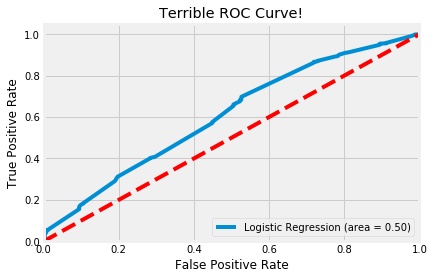

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Terrible ROC Curve!')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Logistic Regression to do - figure out interactions, possibly oversample non-adopted population using SMOTE, really anything to make model not suck so much


#### Up next - KNN!

In [68]:
#reassigning X and y so all variables included again... if it turns out bad, only use ones from logreg maybe

X = train_final.drop('Adopted', axis=1)
y = train_final.Adopted

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=24)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#knn needs variables scaled
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [70]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [71]:
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.6986301369863014


In [72]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 50.

k_range = range(1, 51)
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 50 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [73]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
traintest = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)

traintest

,training error,testing error
K,,
50,0.224470,0.215373
49,0.224144,0.214612
48,0.224796,0.215373
47,0.223817,0.214612
46,0.224144,0.216134
45,0.222512,0.215373
44,0.224796,0.215373
43,0.221860,0.216134
42,0.221860,0.216134


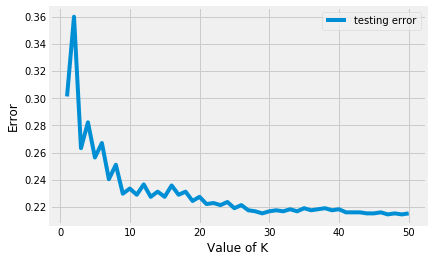

In [74]:
traintest.plot(y='testing error');
plt.xlabel('Value of K');
plt.ylabel('Error');

In [75]:
#best value for k

min(zip(testing_error, k_range))

(0.21461187214611877, 47)

In [76]:
knn = KNeighborsClassifier(n_neighbors=47)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=47, p=2,
           weights='uniform')

In [77]:
y_pred_class = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_class))

print (baseline) 


0.7853881278538812
0.7748776508972267


#### To do for KNN - not sure, try smaller subset of variables maybe? or just accept that KNN is bad

#### Up next: ???